# Evolutionary Computation for Evolving Neural Network EMG Classifier Structure and Weights
In this project, the goal is to improve the structure and weights of a neural network that classifies EMG signals, and compare the genetic solutions to standard classifiers.

Controls:
- Random Forest Classifier
- Neural Network (Backpropagation)

Evolutionary Models:
- NEAT (NeuroEvolution of Augmenting Topologies)
- HyperNEAT

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
from __future__ import annotations
from pathlib import Path
from typing import List, Tuple, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Custom library
from emg_evo_lib_kb import *

In [3]:
# Dataset root
root_path = Path("/Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master")

# Column names in each raw file
emg_column_names = ["Time"] + [f"ch{i}" for i in range(1, 9)] + ["Class"]

# Gesture classes we care about (ignore 0 = unmarked)
# gesture_classes = [1, 2, 3, 4, 5, 6, 7]
gesture_classes = [1, 2, 3, 4, 5, 6]

In [4]:
X, y, meta = build_feature_dataset(root_path, emg_column_names, gesture_classes)
print("X shape:", X.shape)
if len(X) > 0:
    print("Example feature vector length:", len(X[0]))
    print("Example feature vector:", X[0])
    print("Example label:", y[0])
    print("Example meta:", meta[0])

Found 73 EMG files under /Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master
[1/73] 1_raw_data_13-12_22.03.16.txt: 12 gesture segments
[2/73] 2_raw_data_13-13_22.03.16.txt: 12 gesture segments
[3/73] 1_raw_data_14-19_22.03.16.txt: 12 gesture segments
[4/73] 2_raw_data_14-21_22.03.16.txt: 12 gesture segments
[5/73] 1_raw_data_09-32_11.04.16.txt: 12 gesture segments
[6/73] 2_raw_data_09-34_11.04.16.txt: 12 gesture segments
[7/73] 1_raw_data_18-02_24.04.16.txt: 12 gesture segments
[8/73] 2_raw_data_18-03_24.04.16.txt: 12 gesture segments
[9/73] 1_raw_data_10-28_30.03.16.txt: 12 gesture segments
[10/73] 2_raw_data_10-29_30.03.16.txt: 12 gesture segments
[11/73] 1_raw_data_10-38_11.04.16.txt: 12 gesture segments
[12/73] 2_raw_data_10-40_11.04.16.txt: 12 gesture segments
[13/73] 1_raw_data_18-48_22.03.16.txt: 12 gesture segments
[14/73] 2_raw_data_18-50_22.03.16.txt: 12 gesture segments
[15/73] 1_raw_data_12-14_23

In [5]:
len(X)

864

In [6]:
y

array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 5, 4, 6, 1, 2, 3, 4, 5, 6, 1,

Found 73 EMG files under /Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master
[1/73] 1_raw_data_13-12_22.03.16.txt: 12 gesture segments
[2/73] 2_raw_data_13-13_22.03.16.txt: 12 gesture segments
[3/73] 1_raw_data_14-19_22.03.16.txt: 12 gesture segments
[4/73] 2_raw_data_14-21_22.03.16.txt: 12 gesture segments
[5/73] 1_raw_data_09-32_11.04.16.txt: 12 gesture segments
[6/73] 2_raw_data_09-34_11.04.16.txt: 12 gesture segments
[7/73] 1_raw_data_18-02_24.04.16.txt: 12 gesture segments
[8/73] 2_raw_data_18-03_24.04.16.txt: 12 gesture segments
[9/73] 1_raw_data_10-28_30.03.16.txt: 12 gesture segments
[10/73] 2_raw_data_10-29_30.03.16.txt: 12 gesture segments
[11/73] 1_raw_data_10-38_11.04.16.txt: 12 gesture segments
[12/73] 2_raw_data_10-40_11.04.16.txt: 12 gesture segments
[13/73] 1_raw_data_18-48_22.03.16.txt: 12 gesture segments
[14/73] 2_raw_data_18-50_22.03.16.txt: 12 gesture segments
[15/73] 1_raw_data_12-14_23

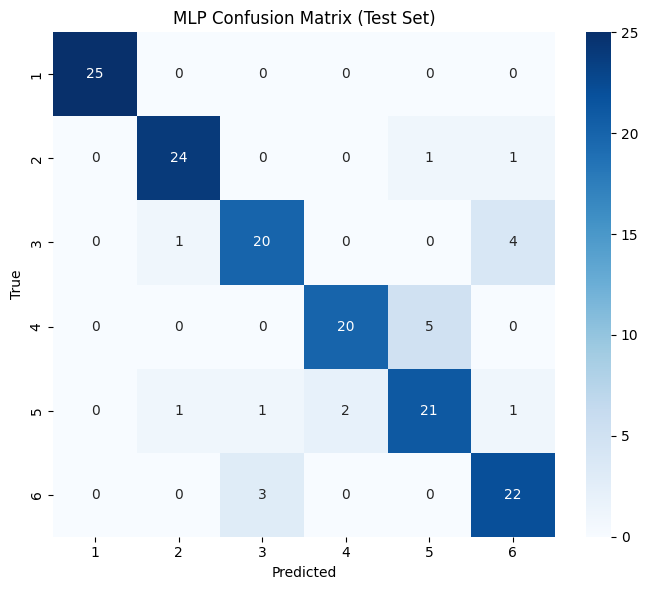

In [7]:
run_control_nn(root_path, emg_column_names, gesture_classes)

## NEAT

Found 73 EMG files under /Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master
[1/73] 1_raw_data_13-12_22.03.16.txt: 12 gesture segments
[2/73] 2_raw_data_13-13_22.03.16.txt: 12 gesture segments
[3/73] 1_raw_data_14-19_22.03.16.txt: 12 gesture segments
[4/73] 2_raw_data_14-21_22.03.16.txt: 12 gesture segments
[5/73] 1_raw_data_09-32_11.04.16.txt: 12 gesture segments
[6/73] 2_raw_data_09-34_11.04.16.txt: 12 gesture segments
[7/73] 1_raw_data_18-02_24.04.16.txt: 12 gesture segments
[8/73] 2_raw_data_18-03_24.04.16.txt: 12 gesture segments
[9/73] 1_raw_data_10-28_30.03.16.txt: 12 gesture segments
[10/73] 2_raw_data_10-29_30.03.16.txt: 12 gesture segments
[11/73] 1_raw_data_10-38_11.04.16.txt: 12 gesture segments
[12/73] 2_raw_data_10-40_11.04.16.txt: 12 gesture segments
[13/73] 1_raw_data_18-48_22.03.16.txt: 12 gesture segments
[14/73] 2_raw_data_18-50_22.03.16.txt: 12 gesture segments
[15/73] 1_raw_data_12-14_23

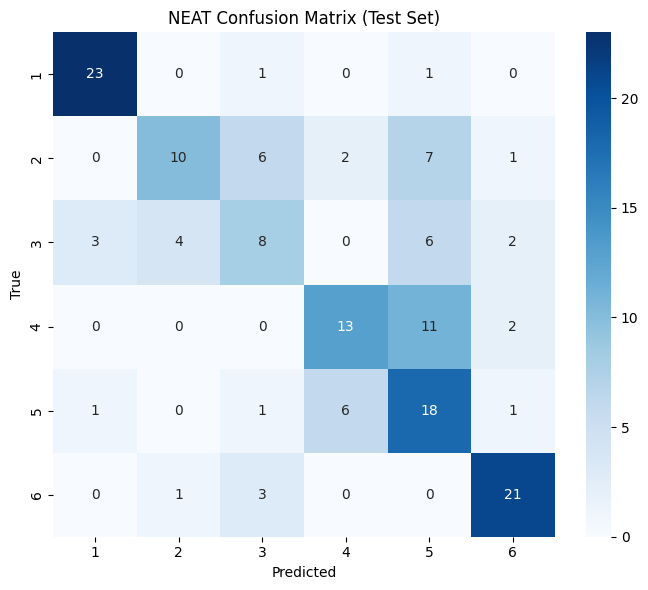

TypeError: 'str' object is not callable

In [17]:
run_neat_emg(root=root_path, emg_column_names=emg_column_names, valid_classes=gesture_classes,
neat_config_path=Path("/Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/Evolutionary-EMG-Classification/configs/neat_emg_config.ini"),
n_generations=50)